In [68]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
%matplotlib inline 

In [69]:
# Import data for occupational groups - employment only
occ_group_empl = pd.read_csv('occ_groups_empl.csv')
occ_group_empl.head()

,Occupation,Occupation Code,2018,2028,Numeric Change,Percent Change,Median Wage
0,Management,11-0000,10193,10900,706.9,6.9,105660
1,Business/Finance,13-0000,8590,9181,591.8,6.9,69820
2,Computer/Mathematics,15-0000,4674,5268,593.9,12.7,88340
3,Architecture/Engineering,17-0000,2699,2812,113.3,4.2,81440
4,Science,19-0000,1323,1420,97.4,7.4,68160


In [70]:
# What are the employment trends of the major occupational groups?
alt.Chart(occ_group_empl).mark_bar().encode(
    x=alt.X('Percent Change:Q', axis=alt.Axis(ticks=False, domain=False), title='Percent Change (%)'),
    y=alt.Y('Occupation:N', sort='-x', axis=alt.Axis(title=None, ticks=False, domain=False)),
    color=alt.Color('Percent Change:Q', legend=None ,scale=alt.Scale(scheme='bluepurple')),
    opacity=alt.value(0.8),
    tooltip = [alt.Tooltip('Occupation:N', title="Occupation Group"),
               alt.Tooltip('2018:Q', format=",", title="2018 Employment (thousands)"),
               alt.Tooltip('2028:Q', format=",", title="2028 Employment (thousands)"),
               alt.Tooltip('Median Wage:Q', format='$,d', title="Median Wage"),
              alt.Tooltip('Percent Change:Q', format=".1f", title='Percent Change (%)')
                ],
).properties(
    title="Employment Trends of Major Occupational Groups, 2018-2028"
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).configure_title(
    fontSize=14,
    align="center",
    color="black"
).interactive()



alt.Chart(...)

In [71]:
# Import data for the fastest growing occupations
occs_fastest=pd.read_csv('fastest_growing_occs.csv')

# Replace missing values with 0
occs_fastest["Median"].fillna(0, inplace = True) 

# Limit to the top 20 occupations
occs_fastest_20 = occs_fastest.nlargest(20,'Percent Change')

occs_fastest_20.head()

,Occupation,Occupation Code,2018 Employment,2028 Employment,Numeric Change,Percent Change,Median
5,Solar photovoltaic installers,47-2231,9.7,15.8,6.1,63.3,44890.0
9,Wind turbine service technicians,49-9081,6.6,10.3,3.8,56.9,52910.0
27,Home health aides,31-1011,831.8,1136.6,304.8,36.6,0.0
28,Personal care aides,39-9021,2421.2,3302.1,881.0,36.4,0.0
13,Occupational therapy assistants,31-2011,43.8,58.3,14.5,33.1,61510.0


In [72]:
# Fastest growing occupations

# Highlight wages that are below the overall median for the country
alt.Chart(occs_fastest_20).mark_bar().encode(
    y=alt.Y('Occupation:N', sort='-x', axis=alt.Axis(title=None, ticks=False, domain=False, labelFontSize=11)),
    x=alt.X('Percent Change:Q', axis=alt.Axis(ticks=False, domain=False), title='Percent Change in Growth (%)'),
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.Median >= 39810,  # If the median is greater than 39810 (2019 OES), this statement is true
        alt.value('#b88abd'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    ),
    opacity=alt.condition(
        alt.datum.Median == 0,  ##turned down opacity for occs with no wage available
        alt.value(0.4),
        alt.value(1)
        ),
    tooltip = [alt.Tooltip('Occupation'),
               alt.Tooltip('2018 Employment', title='2018 Employment (thousands)'),
               alt.Tooltip('2028 Employment', title='2028 Employment (thousands)'),
               alt.Tooltip('Percent Change', format=".1f", title='Percent Change in Growth (%)'),
               alt.Tooltip('Median', title='Median Wage', format='$,d')
                ]
).properties(width=600, title="Fastest Growing Occupations, 2018-2028"
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).interactive()  

# Note: For the tooltip, I wanted to show that the median was N/A if the value is 0.  
# In this case, a 0 wage means the wage is not available, but I could not get the tooltip to work to code in that manner.

alt.Chart(...)

In [73]:
# Import data for the occupations with the most growrh
occs_most=pd.read_csv('most_job_growth.csv')

# Replace missing values with 0
occs_most["Median"].fillna(0, inplace = True) 

# Limited to the top 20 occupations
occs_most_20 = occs_most.nlargest(20,'Numeric Change')

occs_most_20.head()

,Occupation,Occupation Code,2018 Employment,2028 Employment,Numeric Change,Percent Change,Median
0,Personal care aides,39-9021,2421.2,3302.1,881.0,36.4,0.0
1,Food preparation/serving workers,35-3021,3704.2,4344.3,640.1,17.3,0.0
2,Registered nurses,29-1141,3059.8,3431.3,371.5,12.1,73300.0
3,Home health aides,31-1011,831.8,1136.6,304.8,36.6,0.0
4,"Cooks, restaurant",35-2014,1362.3,1661.3,299.0,21.9,27790.0


In [74]:
# Occupations with the greatest growth

# Highlight wages that are below the overall median for the country
alt.Chart(occs_most_20).mark_bar().encode(
    y=alt.Y('Occupation:N', sort='-x', axis=alt.Axis(title=None, ticks=False, domain=False, labelFontSize=11)),
    x=alt.X('Numeric Change:Q', axis=alt.Axis(ticks=False, domain=False), title='Numeric Change (thousands)'),
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.Median >= 39810,  # If the median is greater than 39810 (2019 OES), this statement is true
        alt.value('#b88abd'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    ),
    opacity=alt.condition(
        alt.datum.Median == 0,  ##turned down opacity for occs with no wage available
        alt.value(0.4),
        alt.value(1)
        ),
    tooltip = [alt.Tooltip('Occupation'),
               alt.Tooltip('2018 Employment', title='2018 Employment (thousands)'),
               alt.Tooltip('2028 Employment', title='2028 Employment (thousands)'),
               alt.Tooltip('Numeric Change', format=".1f", title='Numeric Change)'),
               alt.Tooltip('Median', title='Median Wage', format='$,d')
                ]
).properties(width=600, title="Occupations With The Greatest Job Growth, 2018-2028"
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).interactive()  

# Note: For the tooltip, I wanted to show that the median was N/A if the value is 0.  
# In this case, a 0 wage means the wage is not available, but I could not get the tooltip to work to code in that manner.

alt.Chart(...)

In [75]:
# Import data for the fastest declining occupations
occs_declining=pd.read_csv('fastest_declining_occs.csv')

# Replace missing values with 0
occs_declining["Median"].fillna(0, inplace = True) 

# Limit to the top 20 occupations
occs_declining_20 = occs_declining.nsmallest(20,'Percent Change')

occs_declining_20['percent_change_pos'] = np.abs(occs_declining_20['Percent Change'])

occs_declining_20.head()


,Occupation,Occupation Code,2018 Employment,2028 Employment,Numeric Change,Percent Change,Median,percent_change_pos
0,Locomotive firers,53-4012,0.5,0.2,-0.4,-68.3,0.0,68.3
1,Respiratory therapy technicians,29-2054,9.3,3.9,-5.3,-57.5,0.0,57.5
2,Parking enforcement workers,33-3041,8.6,5.4,-3.1,-36.7,40920.0,36.7
3,Word processors and typists,43-9022,60.4,40.0,-20.4,-33.8,40340.0,33.8
4,Watch repairers,49-9064,3.0,2.1,-0.9,-29.6,42520.0,29.6


In [76]:
# Fastest declining occupations

# Highlight wages that are below the overall median for the country
alt.Chart(occs_declining_20).mark_bar().encode(
    y=alt.Y('Occupation:N', sort='-x', axis=alt.Axis(title=None, ticks=False, domain=False, labelFontSize=11)),
    x=alt.X('percent_change_pos:Q', axis=alt.Axis(ticks=False, domain=False), title='Percent Change in Decline (%)'),
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.Median >= 39810,  # If the median is greater than 39810 (2019 OES), this statement is true
        alt.value('#b88abd'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    ),
    opacity=alt.condition(
        alt.datum.Median == 0,  ##turned down opacity for occs with no wage available
        alt.value(0.4),
        alt.value(1)
        ),
    tooltip = [alt.Tooltip('Occupation'),
               alt.Tooltip('2018 Employment', title='2018 Employment (thousands)'),
               alt.Tooltip('2028 Employment', title='2028 Employment (thousands)'),
               alt.Tooltip('Percent Change', format=".1f", title='Percent Change (%)'),
               alt.Tooltip('Median', title='Median Wage', format='$,d')
                ]
).properties(width=600, title="Fastest Declining Occupations, 2018-2028"
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).interactive()  

# Note: For the tooltip, I wanted to show that the median was N/A if the value is 0.  
# In this case, a 0 wage means the wage is not available, but I could not get the tooltip to work to code in that manner.

alt.Chart(...)

In [77]:
# Import data for the largest job declines
occs_most_decl=pd.read_csv('declining_numeric.csv')

# Replace missing values with 0
occs_most_decl["Median"].fillna(0, inplace = True) 

# Limit to the top 20 occupations
occs_most_decl_20 = occs_most_decl.nsmallest(20,'Numeric Change')

occs_most_decl_20['numeric_change_pos'] = np.abs(occs_most_decl_20['Numeric Change'])

occs_most_decl_20.head()


,Occupation,Occupation Code,2018 Employment,2028 Employment,Numeric Change,Percent Change,Median,numeric_change_pos
0,Secretaries except legal,43-6014,"2,382.5","2,170.0",-212.5,-8.9,37690,212.5
1,Assemblers and fabricators,51-2098,"1,379.4","1,217.0",-162.4,-11.8,32350,162.4
2,Cashiers,41-2011,"3,648.5","3,509.8",-138.7,-3.8,23650,138.7
3,Executive secretaries,43-6011,622.5,499.4,-123.0,-19.8,60890,123.0
4,Office clerks,43-9061,"3,158.5","3,047.8",-110.6,-3.5,34040,110.6


In [78]:
# Highlight wages that are below the overall median for the country
alt.Chart(occs_most_decl_20).mark_bar().encode(
    y=alt.Y('Occupation:N', sort='-x', axis=alt.Axis(title=None, ticks=False, domain=False, labelFontSize=11)),
    x=alt.X('numeric_change_pos:Q', axis=alt.Axis(ticks=False, domain=False), title='Numeric Change (thousands)'),
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.Median >= 39810,  # If the median is greater than 39810 (2019 OES), this statement is true
        alt.value('#b88abd'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    ),
    opacity=alt.condition(
        alt.datum.Median == 0,  ##turned down opacity for occs with no wage available
        alt.value(0.4),
        alt.value(1)
        ),
    tooltip = [alt.Tooltip('Occupation'),
               alt.Tooltip('2018 Employment', title='2018 Employment (thousands)'),
               alt.Tooltip('2028 Employment', title='2028 Employment (thousands)'),
               alt.Tooltip('Numeric Change', format=".1f", title='Numeric Change)'),
               alt.Tooltip('Median', title='Median Wage', format='$,d')
                ]
).properties(width=600, title="Occupations With The Greatest Job Decline, 2018-2028"
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).interactive()  

# Note: For the tooltip, I wanted to show that the median was N/A if the value is 0.  
# In this case, a 0 wage means the wage is not available, but I could not get the tooltip to work to code in that manner.

alt.Chart(...)

In [79]:
# Read in the entire occupational projections data set
occs_all = pd.read_csv('occupational_data.csv')


# Data cleaning - convert nulls to 0 for numeric values and to 'Not Available' for the categorical data
occs_all["Education"].fillna("Not Available", inplace = True) 
occs_all["Work Experience"].fillna("Not Available", inplace = True) 
occs_all["10th Percentile"].fillna(0, inplace = True) 
occs_all["25th Percentile"].fillna(0, inplace = True) 
occs_all["Median"].fillna(0, inplace = True) 
occs_all["75th Percentile"].fillna(0, inplace = True) 
occs_all["90th Percentile"].fillna(0, inplace = True) 

# Then get the detailed data only (not the summary data)
occs_detailed=occs_all[(occs_all['subtot']==5)]
occs_detailed.head()

,Occupation Code,Occupational Title,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,...,Percent Labor Force Exits,Percent Occupational Transfers,Occupational Openings,10th Percentile,25th Percentile,Median,75th Percentile,90th Percentile,Education,Work Experience
3,111011,Chief Executives,5,Management,263.2,248.8,-14.4,-5.5,6.8,11.4,...,37.4,62.6,16.8,62290.0,112790.0,184460.0,0.0,0.0,Bachelor's degree,5 years or more
4,111021,General and Operations Managers,5,Management,2376.4,2541.4,165.0,6.9,51.6,162.0,...,24.2,75.8,230.0,45050.0,65660.0,100780.0,157430.0,0.0,Bachelor's degree,5 years or more
5,111031,Legislators,5,Management,51.9,54.6,2.7,5.2,1.3,2.7,...,32.5,67.5,4.3,17690.0,19070.0,29270.0,75520.0,100470.0,Bachelor's degree,Less than 5 years
7,112011,Advertising and Promotions Managers,5,Management,27.6,28.4,0.9,3.2,0.6,2.1,...,22.2,77.8,2.7,61930.0,86330.0,125510.0,175940.0,0.0,Bachelor's degree,Less than 5 years
9,112021,Marketing Managers,5,Management,259.2,280.1,20.9,8.1,5.5,18.4,...,23.0,77.0,26.0,71010.0,97710.0,136850.0,185320.0,0.0,Bachelor's degree,5 years or more


In [80]:
# Create stripplot to show the distribution of all occupations within the occupational groups by median wage.

# Create a data frame where there are no 0 median wages.  These 0s may throw off the appearance of the plot
occs_detailed_median_adj = occs_detailed[(occs_detailed['Median']!=0)]


alt.Chart(occs_detailed_median_adj).mark_circle(size=50).encode(
    x=alt.X('Median:Q', axis=alt.Axis(title='Median Wage ($)')),
    y=alt.Y('Occupation Group:N', axis=alt.Axis(title=None)),
    color=alt.Color('Occupation Group:N', legend=None ,scale=alt.Scale(scheme='rainbow') ), 
    tooltip = [alt.Tooltip('Occupational Title:N'),
               alt.Tooltip('Median:Q', format='$,d', title='Median Wage')
                ],
    opacity=alt.value(0.6)
).properties(height=400,width=600, title="Median Wage Distribution for All Occupations, 2018-2028"
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).configure_title(
    fontSize=14,
    align="center",
    color="black"
).interactive()  




alt.Chart(...)

In [81]:
# Create stripplot to show the distribution of all occupations within the occupational groups by percent change in employment (growth or decline)


alt.Chart(occs_detailed).mark_circle(size=50).encode(
    x=alt.X('Percent Change:Q', axis=alt.Axis(title='Percent Change (%)')),
    y=alt.Y('Occupation Group:N', axis=alt.Axis(title=None)),
    color=alt.Color('Occupation Group:N', legend=None ,scale=alt.Scale(scheme='rainbow') ), 
    tooltip = [alt.Tooltip('Occupational Title:N'),
               alt.Tooltip('Percent Change:Q', title='Percent Change (%)')
                ],
    opacity=alt.value(0.6)
).properties(height=400,width=600, title="Percent Growth/Decline Distribution for All Occupations, 2018-2028"
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).configure_title(
    fontSize=14,
    align="center",
    color="black"
).interactive()  


alt.Chart(...)

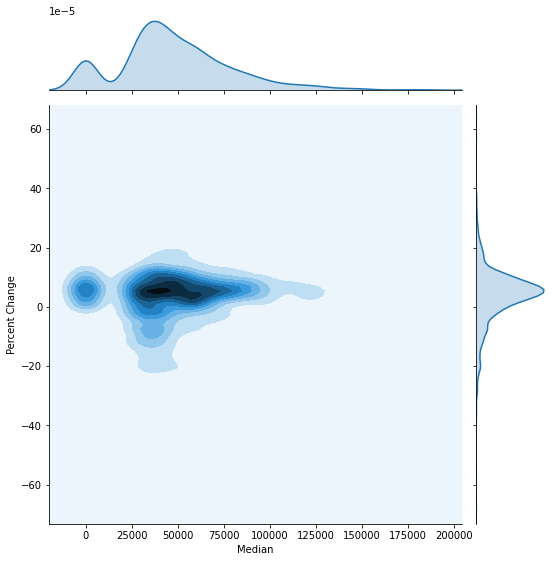

In [82]:
# Create a KDE plot showing the distribution of median wage and percent change
g = sns.jointplot(occs_detailed['Median'], occs_detailed['Percent Change'],  kind="kde")
g.fig.set_size_inches(8, 8)

In [83]:
# Export the KDE plot
g.savefig("kde.png")

In [84]:
# Determine high wage/high demand jobs

# Narrow down all jobs with a median > 0 and percent change > 0
occs_detailed_pos = occs_detailed[(occs_detailed['Percent Change']>0) & (occs_detailed['Median']>0)]

# Set up the option to select portions of the chart based on the legend
selection = alt.selection_multi(fields=['Education'], bind='legend')

# Plot the scatterplot
alt.Chart(occs_detailed_pos).mark_circle(size=30).encode(
    x=alt.X('Median', title="Median Wage ($)"),
    y=alt.Y('Percent Change'),
    color=alt.Color('Education', scale=alt.Scale(scheme='rainbow') ), 
    #tooltip=['Occupational Title', 'Median', 'Percent Change'],
    tooltip = [alt.Tooltip('Occupational Title'),
               alt.Tooltip('Median', format='$,d'),
              alt.Tooltip('Percent Change', format=".1f", title="Percent Change (%)"),
               alt.Tooltip('Education', title='Education')
                ],
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1))
).properties(height=550,width=600, title="Median Wage/Percent Change Distribution by Education, 2018-2028"
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).add_selection(
    selection
).interactive()   

alt.Chart(...)

In [85]:
# Read in the location quotients for manufacturing
mfg_lq = pd.read_csv('mfg_lq.csv')
mfg_lq.head()

,area_fips,county,state,lq
0,1001,Autauga County,Alabama,1.64
1,1003,Baldwin County,Alabama,0.69
2,1005,Barbour County,Alabama,3.53
3,1007,Bibb County,Alabama,1.14
4,1009,Blount County,Alabama,1.82


In [86]:
from vega_datasets import data
us_counties = alt.topo_feature(data.us_10m.url, 'counties')
alt.Chart(us_counties).mark_geoshape().project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(mfg_lq, 'area_fips', ['lq', 'county', 'state'])
).encode(
    color=alt.Color('lq:Q', scale=alt.Scale(scheme='goldred'), title="Location Quotient"),
    tooltip = [alt.Tooltip('county:N', title="County"),
               alt.Tooltip('state:N', title="State"),
                alt.Tooltip('lq:Q', title="LQ")
                ]
).properties(
    width=700,
    height=400, 
    title="Location Quotients for Manufacturing, 2018 Annual Averages"
)

alt.Chart(...)

In [87]:
# Read in the location quotients for health care
health_lq = pd.read_csv('health_lq.csv')
health_lq.head()

,area_fips,county,state,lq
0,1001,Autauga County,Alabama,0.67
1,1003,Baldwin County,Alabama,0.93
2,1005,Barbour County,Alabama,0.00
3,1007,Bibb County,Alabama,0.78
4,1009,Blount County,Alabama,0.00


In [88]:
from vega_datasets import data
us_counties = alt.topo_feature(data.us_10m.url, 'counties')
alt.Chart(us_counties).mark_geoshape().project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(health_lq, 'area_fips', ['lq', 'county', 'state'])
).encode(
    color=alt.Color('lq:Q', scale=alt.Scale(scheme='goldred'), title="Location Quotient"),
    tooltip = [alt.Tooltip('county:N', title="County"),
               alt.Tooltip('state:N', title="State"),
                alt.Tooltip('lq:Q', title="LQ")
                ]
).properties(
    width=700,
    height=400, 
    title="Location Quotients for Health, 2018 Annual Averages"
)

alt.Chart(...)

In [89]:
# Then get the detailed data only (not the summary data) for production occupations
occs_production =occs_all[(occs_all['subtot']==5) & (occs_all['Occupation Group']=='Production')]
occs_production.head()

,Occupation Code,Occupational Title,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,...,Percent Labor Force Exits,Percent Occupational Transfers,Occupational Openings,10th Percentile,25th Percentile,Median,75th Percentile,90th Percentile,Education,Work Experience
868,511011,First-Line Supervisors of Production and Opera...,5,Production,639.7,638.5,-1.3,-0.2,20.3,45.0,...,31.1,68.9,65.2,36740.0,47230.0,61310.0,78830.0,100200.0,High school diploma or equivalent,Less than 5 years
870,512011,Aircraft Structure and Systems,5,Production,45.1,35.2,-9.9,-22.0,0.8,2.7,...,22.9,77.1,2.5,32370.0,40150.0,54210.0,72240.0,84870.0,High school diploma or equivalent,None
872,512021,"Coil Winders, Tapers, and Finishers",5,Production,12.3,9.7,-2.7,-21.6,0.5,0.8,...,38.5,61.5,1.0,24810.0,29200.0,36520.0,46020.0,57240.0,High school diploma or equivalent,None
873,512028,"Electrical, electronic, and electromechanical ...",5,Production,279.6,271.2,-8.4,-3.0,11.8,19.5,...,37.7,62.3,30.5,24030.0,28200.0,34810.0,43320.0,53450.0,High school diploma or equivalent,None
874,512031,Engine and Other Machine Assemblers,5,Production,48.7,40.6,-8.1,-16.7,1.1,4.2,...,20.8,79.2,4.5,30550.0,35690.0,45660.0,57570.0,64450.0,High school diploma or equivalent,None


In [90]:
# Get the top 10 occupations for production by percent growth
occs_production_10 =occs_production.nlargest(10, 'Percent Change')
occs_production_10.head(15)

,Occupation Code,Occupational Title,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,...,Percent Labor Force Exits,Percent Occupational Transfers,Occupational Openings,10th Percentile,25th Percentile,Median,75th Percentile,90th Percentile,Education,Work Experience
894,514012,CNC Machine Tool Programmer,5,Production,24.3,29.2,4.9,20.0,0.8,2.0,...,28.6,71.4,3.2,0.0,0.0,0.0,0.0,0.0,Postsecondary nondegree award,None
989,519082,Medical Appliance Technicians,5,Production,15.5,17.5,2.0,12.7,0.7,1.3,...,35.0,65.0,2.2,25320.0,32160.0,40690.0,53000.0,66860.0,High school diploma or equivalent,None
990,519083,Ophthalmic Laboratory Technicians,5,Production,29.4,32.7,3.2,10.9,1.4,2.4,...,36.8,63.2,4.1,23140.0,26810.0,32620.0,40060.0,49850.0,High school diploma or equivalent,None
988,519081,Dental Laboratory Technicians,5,Production,36.5,40.5,3.9,10.7,1.7,3.0,...,36.2,63.8,5.1,25660.0,31790.0,41340.0,53950.0,65820.0,High school diploma or equivalent,None
1006,519198,Helpers--Production Workers,5,Production,354.6,385.8,31.2,8.8,19.7,34.9,...,36.1,63.9,57.7,20590.0,24120.0,29100.0,36030.0,42600.0,High school diploma or equivalent,None
881,513011,Bakers,5,Production,191.9,203.0,11.1,5.8,11.4,15.6,...,42.2,57.8,28.1,20310.0,23480.0,27700.0,34120.0,41640.0,No formal educational credential,None
994,519122,"Painters, Transportation Equipment",5,Production,58.1,60.8,2.7,4.6,1.8,4.7,...,27.7,72.3,6.7,0.0,0.0,0.0,0.0,0.0,High school diploma or equivalent,None
918,514121,"Welders, Cutters, Solderers",5,Production,424.7,439.1,14.5,3.4,11.1,36.3,...,23.4,76.6,48.8,29470.0,34930.0,42490.0,52350.0,64240.0,High school diploma or equivalent,None
1001,519193,Cooling/Freezing Equipment Operators,5,Production,9.2,9.5,0.3,3.2,0.4,0.7,...,36.4,63.6,1.1,23430.0,27710.0,35290.0,45320.0,54050.0,High school diploma or equivalent,None
959,517099,"Woodworkers, All Other",5,Production,14.7,15.2,0.5,3.1,0.9,0.9,...,50.0,50.0,1.9,21800.0,24970.0,33110.0,43800.0,53680.0,High school diploma or equivalent,None


In [91]:
# Top 10 Production Occupations by Percent Growth, 2018-2028
alt.Chart(occs_production_10).mark_bar().encode(
    x=alt.X('Percent Change:Q', axis=alt.Axis(ticks=False, domain=False, labelFontSize=11), title='Percent Growth (%)'),
    y=alt.Y('Occupational Title:N', sort='-x', axis=alt.Axis(title=None, ticks=False, domain=False)),
    color=alt.Color('Percent Change:N', legend=None ,scale=alt.Scale(scheme='bluepurple')),
    opacity=alt.value(0.8),
    tooltip = [alt.Tooltip('Occupational Title:N', title="Occupation Group"),
               alt.Tooltip('2018 Employment:Q', format=",", title="2018 Employment (thousands)"),
               alt.Tooltip('2028 Employment:Q', format=",", title="2028 Employment (thousands)"),
               alt.Tooltip('Median:Q', format='$,d', title="Median Wage"),
              alt.Tooltip('Percent Change:Q', format=".1f", title='Percent Change (%)')
                ],
).properties(
    title="Top 10 Production Occupations by Percent Growth, 2018-2028"
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).configure_title(
    fontSize=14,
    align="center",
    color="black"
).interactive()

alt.Chart(...)

In [92]:
# Then get the detailed data only (not the summary data) for Health Support occupations - top 10
occs_healthsup =occs_all[(occs_all['subtot']==5) & (occs_all['Occupation Group']=='Health Support')]
occs_healthsup.head()

# Get the top 10 occupations for health support by percent growth
occs_healthsup_10 =occs_healthsup.nlargest(10, 'Percent Change')
occs_healthsup_10.head(15)

,Occupation Code,Occupational Title,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,...,Percent Labor Force Exits,Percent Occupational Transfers,Occupational Openings,10th Percentile,25th Percentile,Median,75th Percentile,90th Percentile,Education,Work Experience
464,311011,Home Health Aides,5,Health Support,831.8,1136.6,304.8,36.6,52.9,57.4,...,48.0,52.0,140.8,0.0,0.0,0.0,0.0,0.0,High school diploma or equivalent,None
470,312011,Occupational Therapy Assistants,5,Health Support,43.8,58.3,14.5,33.1,2.2,3.3,...,40.0,60.0,7.0,41730.0,52150.0,61510.0,73190.0,82210.0,Associate's degree,None
473,312021,Physical Therapist Assistants,5,Health Support,98.4,125.0,26.7,27.1,4.8,9.0,...,34.8,65.2,16.5,33450.0,47690.0,58790.0,69880.0,80840.0,Associate's degree,None
484,319097,Phlebotomists,5,Health Support,128.3,157.8,29.5,23.0,5.3,9.8,...,35.1,64.9,18.1,26000.0,29860.0,35510.0,41490.0,49750.0,Postsecondary nondegree award,None
474,312022,Physical Therapist Aides,5,Health Support,49.8,61.2,11.3,22.8,2.4,4.5,...,34.8,65.2,8.0,20310.0,23320.0,27000.0,32310.0,39740.0,High school diploma or equivalent,None
479,319092,Medical Assistants,5,Health Support,686.6,841.5,154.9,22.6,29.8,54.3,...,35.4,64.6,99.7,25820.0,29460.0,34800.0,40270.0,48720.0,Postsecondary nondegree award,None
476,319011,Massage Therapists,5,Health Support,159.8,195.2,35.4,22.2,11.1,9.6,...,53.6,46.4,24.2,21810.0,29420.0,42820.0,59370.0,80630.0,Postsecondary nondegree award,None
483,319096,Veterinary Assistants,5,Health Support,92.2,109.8,17.6,19.1,5.5,10.8,...,33.7,66.3,18.1,20790.0,24080.0,28590.0,34220.0,39800.0,High school diploma or equivalent,None
471,312012,Occupational Therapy Aides,5,Health Support,7.9,9.4,1.5,18.9,0.4,0.6,...,40.0,60.0,1.1,18960.0,21920.0,29230.0,39330.0,62120.0,High school diploma or equivalent,None
478,319091,Dental Assistants,5,Health Support,346.0,384.7,38.7,11.2,16.9,24.0,...,41.3,58.7,44.8,27980.0,33440.0,40080.0,48550.0,56930.0,Postsecondary nondegree award,None


In [93]:
# Top 10 Health Support Occupations by Percent Growth, 2018-2028
alt.Chart(occs_healthsup_10).mark_bar().encode(
    x=alt.X('Percent Change:Q', axis=alt.Axis(ticks=False, domain=False, labelFontSize=11), title='Percent Growth (%)'),
    y=alt.Y('Occupational Title:N', sort='-x', axis=alt.Axis(title=None, ticks=False, domain=False)),
    color=alt.Color('Percent Change:N', legend=None ,scale=alt.Scale(scheme='bluepurple')),
    opacity=alt.value(0.8),
    tooltip = [alt.Tooltip('Occupational Title:N', title="Occupation Group"),
               alt.Tooltip('2018 Employment:Q', format=",", title="2018 Employment (thousands)"),
               alt.Tooltip('2028 Employment:Q', format=",", title="2028 Employment (thousands)"),
               alt.Tooltip('Median:Q', format='$,d', title="Median Wage"),
              alt.Tooltip('Percent Change:Q', format=".1f", title='Percent Change (%)')
                ],
).properties(
    title="Top 10 Health Support Occupations by Percent Growth, 2018-2028"
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).configure_title(
    fontSize=14,
    align="center",
    color="black"
).interactive()

alt.Chart(...)

In [94]:
# Then get the detailed data only (not the summary data) for Health Support occupations - top 10
occs_healthprac =occs_all[(occs_all['subtot']==5) & (occs_all['Occupation Group']=='Health Practitioners')]
occs_healthprac.head()

# Get the top 10 occupations for health support by percent growth
occs_healthprac_10 =occs_healthprac.nlargest(10, 'Percent Change')
occs_healthprac_10.head(15)

,Occupation Code,Occupational Title,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,...,Percent Labor Force Exits,Percent Occupational Transfers,Occupational Openings,10th Percentile,25th Percentile,Median,75th Percentile,90th Percentile,Education,Work Experience
411,291071,Physician Assistants,5,Health Practitioners,118.8,155.7,37.0,31.1,2.1,5.7,...,26.9,73.1,11.5,72720.0,92800.0,112260.0,130530.0,157120.0,Master's degree,None
426,291171,Nurse Practitioners,5,Health Practitioners,189.1,242.4,53.3,28.2,4.3,7.3,...,37.1,62.9,16.9,81410.0,92790.0,109820.0,127030.0,152160.0,Master's degree,None
419,291127,Speech-Language Pathologists,5,Health Practitioners,153.7,195.6,41.9,27.3,3.4,5.9,...,36.6,63.4,13.5,49840.0,61940.0,79120.0,99380.0,121260.0,Master's degree,None
460,299092,Genetic Counselors,5,Health Practitioners,3.0,3.8,0.8,27.0,0.1,0.1,...,50.0,50.0,0.3,61310.0,70740.0,81880.0,98110.0,114750.0,Master's degree,None
415,291123,Physical Therapists,5,Health Practitioners,247.7,301.9,54.2,21.9,5.0,6.4,...,43.9,56.1,16.9,62120.0,73940.0,89440.0,104210.0,124740.0,Doctoral or professional degree,None
418,291126,Respiratory Therapists,5,Health Practitioners,134.0,162.0,27.9,20.8,4.1,3.8,...,51.9,48.1,10.6,44850.0,52820.0,61330.0,74160.0,86980.0,Associate's degree,None
451,292091,Orthotists and Prosthetists,5,Health Practitioners,9.1,10.9,1.8,19.8,0.3,0.4,...,42.9,57.1,0.9,41360.0,52120.0,68410.0,86580.0,108130.0,Master's degree,None
434,292032,Diagnostic Medical Sonographers,5,Health Practitioners,72.9,87.1,14.2,19.5,2.0,2.4,...,45.5,54.5,5.8,52770.0,61830.0,74320.0,89130.0,102060.0,Associate's degree,None
445,292056,Veterinary Technologists,5,Health Practitioners,109.4,130.5,21.1,19.3,3.5,6.2,...,36.1,63.9,11.8,24530.0,29080.0,35320.0,42540.0,51230.0,Associate's degree,None
459,299091,Athletic Trainers,5,Health Practitioners,31.1,37.0,5.9,18.8,0.8,1.1,...,42.1,57.9,2.5,31300.0,39860.0,48440.0,59430.0,73470.0,Bachelor's degree,None


In [95]:
# Top 10 Health Practitioner Occupations by Percent Growth, 2018-2028
alt.Chart(occs_healthprac_10).mark_bar().encode(
    x=alt.X('Percent Change:Q', axis=alt.Axis(ticks=False, domain=False, labelFontSize=11), title='Percent Growth (%)'),
    y=alt.Y('Occupational Title:N', sort='-x', axis=alt.Axis(title=None, ticks=False, domain=False)),
    color=alt.Color('Percent Change:N', legend=None ,scale=alt.Scale(scheme='bluepurple')),
    opacity=alt.value(0.8),
    tooltip = [alt.Tooltip('Occupational Title:N', title="Occupation Group"),
               alt.Tooltip('2018 Employment:Q', format=",", title="2018 Employment (thousands)"),
               alt.Tooltip('2028 Employment:Q', format=",", title="2028 Employment (thousands)"),
               alt.Tooltip('Median:Q', format='$,d', title="Median Wage"),
              alt.Tooltip('Percent Change:Q', format=".1f", title='Percent Change (%)')
                ],
).properties(
    title="Top 10 Health Practitioner Occupations by Percent Growth, 2018-2028"
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).configure_title(
    fontSize=14,
    align="center",
    color="black"
).interactive()

alt.Chart(...)

In [96]:
# Get the top 10 occupations for production by percent decline
occs_production_10 =occs_production.nsmallest(10, 'Percent Change') 
occs_production_10['percent_change_pos'] = np.abs(occs_production_10['Percent Change'])
occs_production_10.head(15)

,Occupation Code,Occupational Title,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,...,Percent Occupational Transfers,Occupational Openings,10th Percentile,25th Percentile,Median,75th Percentile,90th Percentile,Education,Work Experience,percent_change_pos
981,519031,"Cutters and Trimmers, Hand",5,Production,10.7,7.7,-3.0,-28.4,0.4,0.7,...,63.6,0.8,20850.0,24870.0,30200.0,37370.0,47720.0,No formal educational credential,None,28.4
870,512011,Aircraft Structure and Systems,5,Production,45.1,35.2,-9.9,-22.0,0.8,2.7,...,77.1,2.5,32370.0,40150.0,54210.0,72240.0,84870.0,High school diploma or equivalent,None,22.0
872,512021,"Coil Winders, Tapers, and Finishers",5,Production,12.3,9.7,-2.7,-21.6,0.5,0.8,...,61.5,1.0,24810.0,29200.0,36520.0,46020.0,57240.0,High school diploma or equivalent,None,21.6
997,519151,Photographic Process Workers,5,Production,17.1,13.4,-3.6,-21.3,0.7,1.7,...,70.8,2.0,22300.0,26190.0,32280.0,44650.0,59100.0,High school diploma or equivalent,None,21.3
932,516021,Textile and Garment Workers,5,Production,39.9,31.4,-8.5,-21.2,1.9,2.2,...,53.7,3.3,18410.0,21050.0,24190.0,27980.0,31440.0,No formal educational credential,None,21.2
927,515111,Prepress Technicians and Workers,5,Production,29.9,23.7,-6.2,-20.8,1.0,2.3,...,69.7,2.7,25500.0,31850.0,40510.0,51100.0,62590.0,Postsecondary nondegree award,None,20.8
904,514035,Milling and Planing Machine Setters,5,Production,19.8,15.7,-4.1,-20.7,0.6,1.2,...,66.7,1.4,27320.0,33870.0,43210.0,54090.0,63960.0,High school diploma or equivalent,None,20.7
901,514032,Drilling Tool Setters,5,Production,11.6,9.2,-2.4,-20.5,0.4,0.7,...,63.6,0.9,26240.0,31290.0,38910.0,50420.0,63660.0,High school diploma or equivalent,None,20.5
897,514022,Forging Machine Setters,5,Production,18.6,15.0,-3.6,-19.5,0.4,1.1,...,73.3,1.2,26830.0,32460.0,39670.0,49320.0,58840.0,High school diploma or equivalent,None,19.5
941,516061,Texile Bleaching/Dyeing Mach.Ops,5,Production,9.7,7.9,-1.9,-19.4,0.5,0.7,...,58.3,1.0,22200.0,24980.0,29460.0,35860.0,41060.0,High school diploma or equivalent,None,19.4


In [97]:
# Top 10 Production Occupations by Percent Decline, 2018-2018
alt.Chart(occs_production_10).mark_bar().encode(
    x=alt.X('percent_change_pos:Q', axis=alt.Axis(ticks=False, domain=False, labelFontSize=11), title='Percent Decline (%)'),
    y=alt.Y('Occupational Title:N', sort='-x', axis=alt.Axis(title=None, ticks=False, domain=False)),
    color=alt.Color('percent_change_pos:N', legend=None , scale=alt.Scale(scheme='bluepurple')),
    opacity=alt.value(0.7),
    tooltip = [alt.Tooltip('Occupational Title:N', title="Occupation Group"),
               alt.Tooltip('2018 Employment:Q', format=",", title="2018 Employment (thousands)"),
               alt.Tooltip('2028 Employment:Q', format=",", title="2028 Employment (thousands)"),
               alt.Tooltip('Median:Q', format='$,d', title="Median Wage"),
              alt.Tooltip('percent_change_pos:Q', format=".1f", title='Percent Decline (%)')
                ],
).properties(
    title="Top 10 Production Occupations by Percent Decline, 2018-2028"
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).configure_title(
    fontSize=14,
    align="center",
    color="black"
).interactive()

alt.Chart(...)

In [98]:
# Then get the detailed data only (not the summary data) for Health Support occupations - top 10
occs_healthsup =occs_all[(occs_all['subtot']==5) & (occs_all['Occupation Group']=='Health Support') & (occs_all['Percent Change'] < 0)]

# Get the top 10 occupations for health support by percent decline
occs_healthsup_10 =occs_healthsup.nsmallest(10, 'Percent Change')
occs_healthsup_10['percent_change_pos'] = np.abs(occs_healthsup_10['Percent Change'])
occs_healthsup_10.head(15)

,Occupation Code,Occupational Title,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,...,Percent Occupational Transfers,Occupational Openings,10th Percentile,25th Percentile,Median,75th Percentile,90th Percentile,Education,Work Experience,percent_change_pos
482,319095,Pharmacy Aides,5,Health Support,37.0,32.6,-4.5,-12.1,1.7,2.7,...,61.4,4.0,20300.0,23560.0,27850.0,34970.0,46500.0,High school diploma or equivalent,None,12.1
481,319094,Medical Transcriptionists,5,Health Support,58.0,56.0,-2.0,-3.5,3.5,4.5,...,56.3,7.7,22160.0,25690.0,33380.0,42460.0,51260.0,Postsecondary nondegree award,None,3.5


In [99]:
# Top 10 Health Support Occupations by Percent Decline, 2018-2018
alt.Chart(occs_healthsup_10).mark_bar().encode(
    x=alt.X('percent_change_pos:Q', axis=alt.Axis(ticks=False, domain=False, labelFontSize=11), title='Percent Decline (%)'),
    y=alt.Y('Occupational Title:N', sort='-x', axis=alt.Axis(title=None, ticks=False, domain=False)),
    color=alt.Color('percent_change_pos:N', legend=None , scale=alt.Scale(scheme='bluepurple')),
    opacity=alt.value(0.7),
    tooltip = [alt.Tooltip('Occupational Title:N', title="Occupation Group"),
               alt.Tooltip('2018 Employment:Q', format=",", title="2018 Employment (thousands)"),
               alt.Tooltip('2028 Employment:Q', format=",", title="2028 Employment (thousands)"),
               alt.Tooltip('Median:Q', format='$,d', title="Median Wage"),
              alt.Tooltip('percent_change_pos:Q', format=".1f", title='Percent Decline (%)')
                ],
).properties(
    title="Health Support Occupations by Percent Decline, 2018-2028"
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).configure_title(
    fontSize=14,
    align="center",
    color="black"
).interactive()

alt.Chart(...)

In [100]:
# Then get the detailed data only (not the summary data) for Health practitioners occupations - top 10
occs_healthprac =occs_all[(occs_all['subtot']==5) & (occs_all['Occupation Group']=='Health Practitioners') & (occs_all['Percent Change'] < 0)]

# Get the top 10 occupations for health practitioners by percent decline
occs_healthprac_10 =occs_healthprac.nsmallest(10, 'Percent Change')
occs_healthprac_10['percent_change_pos'] = np.abs(occs_healthprac_10['Percent Change'])
occs_healthprac_10.head(15)

,Occupation Code,Occupational Title,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,...,Percent Occupational Transfers,Occupational Openings,10th Percentile,25th Percentile,Median,75th Percentile,90th Percentile,Education,Work Experience,percent_change_pos
443,292054,Respiratory Therapy Technicians,5,Health Practitioners,9.3,3.9,-5.3,-57.5,0.2,0.3,...,60.0,0.0,0.0,0.0,0.0,0.0,0.0,Associate's degree,None,57.5


In [101]:
# Top 10 Health Support Occupations by Percent Decline, 2018-2018
alt.Chart(occs_healthprac_10).mark_bar().encode(
    x=alt.X('percent_change_pos:Q', axis=alt.Axis(ticks=False, domain=False, labelFontSize=11), title='Percent Decline (%)'),
    y=alt.Y('Occupational Title:N', sort='-x', axis=alt.Axis(title=None, ticks=False, domain=False)),
    color=alt.Color('percent_change_pos:N', legend=None , scale=alt.Scale(scheme='bluepurple')),
    opacity=alt.value(0.7),
    tooltip = [alt.Tooltip('Occupational Title:N', title="Occupation Group"),
               alt.Tooltip('2018 Employment:Q', format=",", title="2018 Employment (thousands)"),
               alt.Tooltip('2028 Employment:Q', format=",", title="2028 Employment (thousands)"),
               alt.Tooltip('Median:Q', format='$,d', title="Median Wage"),
              alt.Tooltip('percent_change_pos:Q', format=".1f", title='Percent Decline (%)')
                ],
).properties(
    title="Top 10 Health Support Occupations by Percent Decline, 2018-2018"
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).configure_title(
    fontSize=14,
    align="center",
    color="black"
).interactive()

alt.Chart(...)

In [102]:
# Get the top 10 occupations for production by percent growth
occs_production_10 =occs_production.nlargest(10, 'Percent Change')
occs_production_10.head(15)

,Occupation Code,Occupational Title,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,...,Percent Labor Force Exits,Percent Occupational Transfers,Occupational Openings,10th Percentile,25th Percentile,Median,75th Percentile,90th Percentile,Education,Work Experience
894,514012,CNC Machine Tool Programmer,5,Production,24.3,29.2,4.9,20.0,0.8,2.0,...,28.6,71.4,3.2,0.0,0.0,0.0,0.0,0.0,Postsecondary nondegree award,None
989,519082,Medical Appliance Technicians,5,Production,15.5,17.5,2.0,12.7,0.7,1.3,...,35.0,65.0,2.2,25320.0,32160.0,40690.0,53000.0,66860.0,High school diploma or equivalent,None
990,519083,Ophthalmic Laboratory Technicians,5,Production,29.4,32.7,3.2,10.9,1.4,2.4,...,36.8,63.2,4.1,23140.0,26810.0,32620.0,40060.0,49850.0,High school diploma or equivalent,None
988,519081,Dental Laboratory Technicians,5,Production,36.5,40.5,3.9,10.7,1.7,3.0,...,36.2,63.8,5.1,25660.0,31790.0,41340.0,53950.0,65820.0,High school diploma or equivalent,None
1006,519198,Helpers--Production Workers,5,Production,354.6,385.8,31.2,8.8,19.7,34.9,...,36.1,63.9,57.7,20590.0,24120.0,29100.0,36030.0,42600.0,High school diploma or equivalent,None
881,513011,Bakers,5,Production,191.9,203.0,11.1,5.8,11.4,15.6,...,42.2,57.8,28.1,20310.0,23480.0,27700.0,34120.0,41640.0,No formal educational credential,None
994,519122,"Painters, Transportation Equipment",5,Production,58.1,60.8,2.7,4.6,1.8,4.7,...,27.7,72.3,6.7,0.0,0.0,0.0,0.0,0.0,High school diploma or equivalent,None
918,514121,"Welders, Cutters, Solderers",5,Production,424.7,439.1,14.5,3.4,11.1,36.3,...,23.4,76.6,48.8,29470.0,34930.0,42490.0,52350.0,64240.0,High school diploma or equivalent,None
1001,519193,Cooling/Freezing Equipment Operators,5,Production,9.2,9.5,0.3,3.2,0.4,0.7,...,36.4,63.6,1.1,23430.0,27710.0,35290.0,45320.0,54050.0,High school diploma or equivalent,None
959,517099,"Woodworkers, All Other",5,Production,14.7,15.2,0.5,3.1,0.9,0.9,...,50.0,50.0,1.9,21800.0,24970.0,33110.0,43800.0,53680.0,High school diploma or equivalent,None


In [103]:
# Convert the top 10 production occupations into tidy data format
occs_production_10_tidy = pd.melt(occs_production_10, id_vars=['Occupational Title'], value_vars=['10th Percentile', '25th Percentile', 'Median', '75th Percentile', '90th Percentile'], var_name='Percentile', value_name='Wage')

# Don't include missing occupations recoded as 0
occs_production_10_tidy = occs_production_10_tidy[occs_production_10_tidy['Wage']!=0]
occs_production_10_tidy.head(100)

,Occupational Title,Percentile,Wage
1,Medical Appliance Technicians,10th Percentile,25320.0
2,Ophthalmic Laboratory Technicians,10th Percentile,23140.0
3,Dental Laboratory Technicians,10th Percentile,25660.0
4,Helpers--Production Workers,10th Percentile,20590.0
5,Bakers,10th Percentile,20310.0
7,"Welders, Cutters, Solderers",10th Percentile,29470.0
8,Cooling/Freezing Equipment Operators,10th Percentile,23430.0
9,"Woodworkers, All Other",10th Percentile,21800.0
11,Medical Appliance Technicians,25th Percentile,32160.0
12,Ophthalmic Laboratory Technicians,25th Percentile,26810.0


In [104]:
# Wage ranges for the top 10 production occupations

alt.Chart(occs_production_10_tidy).mark_circle(size=50).encode(
    x=alt.X('Wage:Q', axis=alt.Axis(ticks=False, domain=False, labelFontSize=11), title='Wage ($)'),
    y=alt.Y('Occupational Title:N', sort='-x', axis=alt.Axis(title=None, ticks=False, domain=False, labelFontSize=11)),
    color=alt.Color('Occupational Title:N', legend=None ,scale=alt.Scale(scheme='category10') ), 
    #tooltip=['Occupational Title', 'Median', 'Percent Change'],
    tooltip = [alt.Tooltip('Occupational Title:N'),
               alt.Tooltip('Percentile:N'),
               alt.Tooltip('Wage:Q', format='$,d')
                ],
    opacity=alt.value(1)
).properties(height=300,width=600
).properties(
    title="Top Production Occupations by Wage (2019)"
).configure_axis(
    grid=True
).configure_view(
    strokeWidth=0
).interactive()  



alt.Chart(...)

In [105]:
# Get the top 10 occupations for health support by percent decline
occs_healthsup =occs_all[(occs_all['subtot']==5) & (occs_all['Occupation Group']=='Health Support')]
occs_healthsup_10 =occs_healthsup.nlargest(10, 'Percent Change')
occs_healthsup_10['Percent Change'] = np.abs(occs_healthsup_10['Percent Change'])
occs_healthsup_10.head(15)

,Occupation Code,Occupational Title,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,...,Percent Labor Force Exits,Percent Occupational Transfers,Occupational Openings,10th Percentile,25th Percentile,Median,75th Percentile,90th Percentile,Education,Work Experience
464,311011,Home Health Aides,5,Health Support,831.8,1136.6,304.8,36.6,52.9,57.4,...,48.0,52.0,140.8,0.0,0.0,0.0,0.0,0.0,High school diploma or equivalent,None
470,312011,Occupational Therapy Assistants,5,Health Support,43.8,58.3,14.5,33.1,2.2,3.3,...,40.0,60.0,7.0,41730.0,52150.0,61510.0,73190.0,82210.0,Associate's degree,None
473,312021,Physical Therapist Assistants,5,Health Support,98.4,125.0,26.7,27.1,4.8,9.0,...,34.8,65.2,16.5,33450.0,47690.0,58790.0,69880.0,80840.0,Associate's degree,None
484,319097,Phlebotomists,5,Health Support,128.3,157.8,29.5,23.0,5.3,9.8,...,35.1,64.9,18.1,26000.0,29860.0,35510.0,41490.0,49750.0,Postsecondary nondegree award,None
474,312022,Physical Therapist Aides,5,Health Support,49.8,61.2,11.3,22.8,2.4,4.5,...,34.8,65.2,8.0,20310.0,23320.0,27000.0,32310.0,39740.0,High school diploma or equivalent,None
479,319092,Medical Assistants,5,Health Support,686.6,841.5,154.9,22.6,29.8,54.3,...,35.4,64.6,99.7,25820.0,29460.0,34800.0,40270.0,48720.0,Postsecondary nondegree award,None
476,319011,Massage Therapists,5,Health Support,159.8,195.2,35.4,22.2,11.1,9.6,...,53.6,46.4,24.2,21810.0,29420.0,42820.0,59370.0,80630.0,Postsecondary nondegree award,None
483,319096,Veterinary Assistants,5,Health Support,92.2,109.8,17.6,19.1,5.5,10.8,...,33.7,66.3,18.1,20790.0,24080.0,28590.0,34220.0,39800.0,High school diploma or equivalent,None
471,312012,Occupational Therapy Aides,5,Health Support,7.9,9.4,1.5,18.9,0.4,0.6,...,40.0,60.0,1.1,18960.0,21920.0,29230.0,39330.0,62120.0,High school diploma or equivalent,None
478,319091,Dental Assistants,5,Health Support,346.0,384.7,38.7,11.2,16.9,24.0,...,41.3,58.7,44.8,27980.0,33440.0,40080.0,48550.0,56930.0,Postsecondary nondegree award,None


In [106]:
# Convert the top 10 health support occupations into tidy data format
occs_healthsup_10_tidy = pd.melt(occs_healthsup_10, id_vars=['Occupational Title'], value_vars=['10th Percentile', '25th Percentile', 'Median', '75th Percentile', '90th Percentile'], var_name='Percentile', value_name='Wage')

# Don't include missing occupations recoded as 0
occs_healthsup_10_tidy = occs_healthsup_10_tidy[occs_healthsup_10_tidy['Wage']!=0]
occs_healthsup_10_tidy.head(100)

,Occupational Title,Percentile,Wage
1,Occupational Therapy Assistants,10th Percentile,41730.0
2,Physical Therapist Assistants,10th Percentile,33450.0
3,Phlebotomists,10th Percentile,26000.0
4,Physical Therapist Aides,10th Percentile,20310.0
5,Medical Assistants,10th Percentile,25820.0
6,Massage Therapists,10th Percentile,21810.0
7,Veterinary Assistants,10th Percentile,20790.0
8,Occupational Therapy Aides,10th Percentile,18960.0
9,Dental Assistants,10th Percentile,27980.0
11,Occupational Therapy Assistants,25th Percentile,52150.0


In [107]:
# Wage ranges for the top 10 health support occupations

alt.Chart(occs_healthsup_10_tidy).mark_circle(size=50).encode(
    x=alt.X('Wage:Q', axis=alt.Axis(ticks=False, domain=False, labelFontSize=11), title='Wage ($)'),
    y=alt.Y('Occupational Title:N', sort='-x', axis=alt.Axis(title=None, ticks=False, domain=False, labelFontSize=11)),
    color=alt.Color('Occupational Title:N', legend=None ,scale=alt.Scale(scheme='category10') ), 
    #tooltip=['Occupational Title', 'Median', 'Percent Change'],
    tooltip = [alt.Tooltip('Occupational Title:N'),
               alt.Tooltip('Percentile:N'),
               alt.Tooltip('Wage:Q', format='$,d')
                ],
    opacity=alt.value(1)
).properties(height=300,width=600
).properties(
    title="Top Health Support Occupations by Wage (2019)"
).configure_axis(
    grid=True
).configure_view(
    strokeWidth=0
).interactive()  

alt.Chart(...)

In [108]:
# Then get the detailed data only (not the summary data) for Health Support occupations - top 10
occs_healthprac =occs_all[(occs_all['subtot']==5) & (occs_all['Occupation Group']=='Health Practitioners')]
occs_healthprac.head()

# Get the top 10 occupations for health support by percent growth
occs_healthprac_10 =occs_healthprac.nlargest(10, 'Percent Change')
occs_healthprac_10.head(15)

,Occupation Code,Occupational Title,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,...,Percent Labor Force Exits,Percent Occupational Transfers,Occupational Openings,10th Percentile,25th Percentile,Median,75th Percentile,90th Percentile,Education,Work Experience
411,291071,Physician Assistants,5,Health Practitioners,118.8,155.7,37.0,31.1,2.1,5.7,...,26.9,73.1,11.5,72720.0,92800.0,112260.0,130530.0,157120.0,Master's degree,None
426,291171,Nurse Practitioners,5,Health Practitioners,189.1,242.4,53.3,28.2,4.3,7.3,...,37.1,62.9,16.9,81410.0,92790.0,109820.0,127030.0,152160.0,Master's degree,None
419,291127,Speech-Language Pathologists,5,Health Practitioners,153.7,195.6,41.9,27.3,3.4,5.9,...,36.6,63.4,13.5,49840.0,61940.0,79120.0,99380.0,121260.0,Master's degree,None
460,299092,Genetic Counselors,5,Health Practitioners,3.0,3.8,0.8,27.0,0.1,0.1,...,50.0,50.0,0.3,61310.0,70740.0,81880.0,98110.0,114750.0,Master's degree,None
415,291123,Physical Therapists,5,Health Practitioners,247.7,301.9,54.2,21.9,5.0,6.4,...,43.9,56.1,16.9,62120.0,73940.0,89440.0,104210.0,124740.0,Doctoral or professional degree,None
418,291126,Respiratory Therapists,5,Health Practitioners,134.0,162.0,27.9,20.8,4.1,3.8,...,51.9,48.1,10.6,44850.0,52820.0,61330.0,74160.0,86980.0,Associate's degree,None
451,292091,Orthotists and Prosthetists,5,Health Practitioners,9.1,10.9,1.8,19.8,0.3,0.4,...,42.9,57.1,0.9,41360.0,52120.0,68410.0,86580.0,108130.0,Master's degree,None
434,292032,Diagnostic Medical Sonographers,5,Health Practitioners,72.9,87.1,14.2,19.5,2.0,2.4,...,45.5,54.5,5.8,52770.0,61830.0,74320.0,89130.0,102060.0,Associate's degree,None
445,292056,Veterinary Technologists,5,Health Practitioners,109.4,130.5,21.1,19.3,3.5,6.2,...,36.1,63.9,11.8,24530.0,29080.0,35320.0,42540.0,51230.0,Associate's degree,None
459,299091,Athletic Trainers,5,Health Practitioners,31.1,37.0,5.9,18.8,0.8,1.1,...,42.1,57.9,2.5,31300.0,39860.0,48440.0,59430.0,73470.0,Bachelor's degree,None


In [109]:
# Convert the top 10 health support occupations into tidy data format
occs_healthprac_10_tidy = pd.melt(occs_healthprac_10, id_vars=['Occupational Title'], value_vars=['10th Percentile', '25th Percentile', 'Median', '75th Percentile', '90th Percentile'], var_name='Percentile', value_name='Wage')

# Don't include missing occupations recoded as 0
occs_healthprac_10_tidy = occs_healthprac_10_tidy[occs_healthprac_10_tidy['Wage']!=0]
occs_healthprac_10_tidy.head()

,Occupational Title,Percentile,Wage
0,Physician Assistants,10th Percentile,72720.0
1,Nurse Practitioners,10th Percentile,81410.0
2,Speech-Language Pathologists,10th Percentile,49840.0
3,Genetic Counselors,10th Percentile,61310.0
4,Physical Therapists,10th Percentile,62120.0


In [110]:
# Wage ranges for the top 10 health practitioners occupations

alt.Chart(occs_healthprac_10_tidy).mark_circle(size=50).encode(
    x=alt.X('Wage:Q', axis=alt.Axis(ticks=False, domain=False, labelFontSize=11), title='Wage ($)'),
    y=alt.Y('Occupational Title:N', sort='-x', axis=alt.Axis(title=None, ticks=False, domain=False, labelFontSize=11)),
    color=alt.Color('Occupational Title:N', legend=None ,scale=alt.Scale(scheme='category10') ), 
    #tooltip=['Occupational Title', 'Median', 'Percent Change'],
    tooltip = [alt.Tooltip('Occupational Title:N'),
               alt.Tooltip('Percentile:N'),
               alt.Tooltip('Wage:Q', format='$,d')
                ],
    opacity=alt.value(1)
).properties(height=300,width=600
).properties(
    title="Top Health Practitioner Occupations by Wage (2019)"
).configure_axis(
    grid=True
).configure_view(
    strokeWidth=0
).interactive()  

alt.Chart(...)

In [111]:
# Import the industries of the top 10 occupations
inds = pd.read_csv('ind_in_occ.csv')
inds.head()

,Occupation Code,Occupational Title,Industry Code,Industry Title,Percent Occupational Total - Base,Percent Occupational Total - Projected,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,Total Separations,Percent Labor Force Exits,Percent Occupational Transfers,Occupational Openings
0,291071,Physician Assistants,540000,Professional and Technical Services,0.4,0.4,5,Health Practitioners,0.5,0.6,0.1,13.2,NaN,NaN,NaN,NaN,NaN,NaN
1,291071,Physician Assistants,550000,Management of Companies,0.1,0.1,5,Health Practitioners,0.2,0.2,0.0,6.7,NaN,NaN,NaN,NaN,NaN,NaN
2,291071,Physician Assistants,560000,Administrative and Waste Services,2.0,1.6,5,Health Practitioners,2.4,2.4,0.1,2.6,NaN,NaN,NaN,NaN,NaN,NaN
3,291071,Physician Assistants,610000,Educational Services,3.0,2.5,5,Health Practitioners,3.5,3.9,0.3,9.8,NaN,NaN,NaN,NaN,NaN,NaN
4,291071,Physician Assistants,620000,Health Care and Social Assistance,90.8,92.4,5,Health Practitioners,107.8,143.8,36.0,33.4,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# Create dataframe for production occupations
inds_prod =inds[(inds['Occupation Group']=='Production') & (inds['Percent Occupational Total - Projected']!=0)]
inds_prod.head()

,Occupation Code,Occupational Title,Industry Code,Industry Title,Percent Occupational Total - Base,Percent Occupational Total - Projected,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,Total Separations,Percent Labor Force Exits,Percent Occupational Transfers,Occupational Openings
121,513011,Bakers,31-330,Manufacturing,29.6,28.3,5,Production,56.9,57.5,0.6,1.1,NaN,NaN,NaN,NaN,NaN,NaN
122,513011,Bakers,420000,Wholesale Trade,1.7,1.7,5,Production,3.3,3.4,0.1,3.1,NaN,NaN,NaN,NaN,NaN,NaN
123,513011,Bakers,48-490,Transportation and warehousing,0.1,0.1,5,Production,0.2,0.2,0.0,10.1,NaN,NaN,NaN,NaN,NaN,NaN
124,513011,Bakers,550000,Management of Companies,0.1,0.1,5,Production,0.2,0.2,0.0,6.7,NaN,NaN,NaN,NaN,NaN,NaN
125,513011,Bakers,560000,Administrative and Waste Services,1.1,1.1,5,Production,2.2,2.3,0.1,3.3,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Scatterplot matrix for production
alt.Chart(inds_prod).mark_circle(size=50).encode(
    x=alt.X('Percent Occupational Total - Projected:Q', scale=alt.Scale(zero=False, type='log'), axis=alt.Axis(ticks=False), title='Percent Occ. Total (2028)'),
    y=alt.Y('Industry Title:N', axis=alt.Axis(title=None, ticks=False, labelFontSize=11)),
    color=alt.Color('Industry Title', scale=alt.Scale(scheme='category10'), legend=None),
    facet=alt.Facet('Occupational Title:N', columns=3, title=None, header=alt.Header(labelFontSize=11)),
    tooltip = [alt.Tooltip('Industry Title', title="Industry"),
              alt.Tooltip('Percent Occupational Total - Projected', format=".1f", title='Percent Total (%)')
                ]
).properties(
    width=200,
    height=200
).configure_axis(
    grid=False
)

alt.Chart(...)

In [114]:
# Create dataframe for health practitioners occupations
inds_healthprac =inds[(inds['Occupation Group']=='Health Practitioners') & (inds['Percent Occupational Total - Projected']!=0)]
inds_healthprac.head()

,Occupation Code,Occupational Title,Industry Code,Industry Title,Percent Occupational Total - Base,Percent Occupational Total - Projected,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,Total Separations,Percent Labor Force Exits,Percent Occupational Transfers,Occupational Openings
0,291071,Physician Assistants,540000,Professional and Technical Services,0.4,0.4,5,Health Practitioners,0.5,0.6,0.1,13.2,NaN,NaN,NaN,NaN,NaN,NaN
1,291071,Physician Assistants,550000,Management of Companies,0.1,0.1,5,Health Practitioners,0.2,0.2,0.0,6.7,NaN,NaN,NaN,NaN,NaN,NaN
2,291071,Physician Assistants,560000,Administrative and Waste Services,2.0,1.6,5,Health Practitioners,2.4,2.4,0.1,2.6,NaN,NaN,NaN,NaN,NaN,NaN
3,291071,Physician Assistants,610000,Educational Services,3.0,2.5,5,Health Practitioners,3.5,3.9,0.3,9.8,NaN,NaN,NaN,NaN,NaN,NaN
4,291071,Physician Assistants,620000,Health Care and Social Assistance,90.8,92.4,5,Health Practitioners,107.8,143.8,36.0,33.4,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# Scatterplot matrix for health practitioners
alt.Chart(inds_healthprac).mark_circle(size=50).encode(
    x=alt.X('Percent Occupational Total - Projected:Q', scale=alt.Scale(zero=False, type='log'), axis=alt.Axis(ticks=False), title='Percent Occ. Total (2028)'),
    y=alt.Y('Industry Title:N', axis=alt.Axis(title=None, ticks=False, labelFontSize=11)),
    color=alt.Color('Industry Title', scale=alt.Scale(scheme='category10'), legend=None),
    facet=alt.Facet('Occupational Title:N', columns=3, title=None, header=alt.Header(labelFontSize=11)),
    tooltip = [alt.Tooltip('Industry Title', title="Industry"),
              alt.Tooltip('Percent Occupational Total - Projected', format=".1f", title='Percent Total (%)')
                ]
).properties(
    width=200,
    height=200
).configure_axis(
    grid=False
)

alt.Chart(...)

In [116]:
# Create dataframe for health support occupations
inds_healthsup =inds[(inds['Occupation Group']=='Health Support') & (inds['Percent Occupational Total - Projected']!=0)]
inds_healthsup.head()

,Occupation Code,Occupational Title,Industry Code,Industry Title,Percent Occupational Total - Base,Percent Occupational Total - Projected,subtot,Occupation Group,2018 Employment,2028 Employment,Numeric Change,Percent Change,Labor Force Exits,Occupational Transfers,Total Separations,Percent Labor Force Exits,Percent Occupational Transfers,Occupational Openings
64,311011,Home Health Aides,560000,Administrative and Waste Services,1.9,1.4,5,Health Support,15.7,15.7,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
66,311011,Home Health Aides,620000,Health Care and Social Assistance,93.4,94.1,5,Health Support,776.5,1069.3,292.8,37.7,NaN,NaN,NaN,NaN,NaN,NaN
67,311011,Home Health Aides,810000,"Other Services, Ex. Public Admin",0.6,0.5,5,Health Support,5.3,5.1,-0.2,-2.9,NaN,NaN,NaN,NaN,NaN,NaN
68,312011,Occupational Therapy Assistants,550000,Management of Companies,0.1,0.1,5,Health Support,0.1,0.1,0.0,6.7,NaN,NaN,NaN,NaN,NaN,NaN
69,312011,Occupational Therapy Assistants,560000,Administrative and Waste Services,1.4,1.1,5,Health Support,0.6,0.6,0.0,2.1,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# Scatterplot matrix for health support occupations
alt.Chart(inds_healthsup).mark_circle(size=50).encode(
    x=alt.X('Percent Occupational Total - Projected:Q', scale=alt.Scale(zero=False, type='log'), axis=alt.Axis(ticks=False), title='Percent Occ. Total (2028)'),
    y=alt.Y('Industry Title:N', axis=alt.Axis(title=None, ticks=False, labelFontSize=11)),
    color=alt.Color('Industry Title', scale=alt.Scale(scheme='category10'), legend=None),
    facet=alt.Facet('Occupational Title:N', columns=3, title=None, header=alt.Header(labelFontSize=11)),
    tooltip = [alt.Tooltip('Industry Title', title="Industry"),
              alt.Tooltip('Percent Occupational Total - Projected', format=".1f", title='Percent Total (%)')
                ]
).properties(
    width=200,
    height=200
).configure_axis(
    grid=False
)

alt.Chart(...)

In [118]:
# Create a dataframe with just the occupation and the percent change for production occupations.  This will be for the word cloud.
occs_production_words = occs_production[['Occupational Title', 'Percent Change']].copy(deep=True)
occs_production_words = occs_production_words[occs_production_words['Percent Change'] > 0]
occs_production_words.head()

,Occupational Title,Percent Change
877,Fiberglass Laminators and Fabricators,0.5
881,Bakers,5.8
883,Butchers and Meat Cutters,2.9
884,"Meat, Poultry, and Fish Cutters and Trimmers",1.6
885,Slaughterers and Meat Packers,2.3


In [119]:
# In order to create a word cloud, we must convert the data frame into a tuple, which shows the occupational title its count.
prod_tuple = [tuple(x) for x in occs_production_words.values]

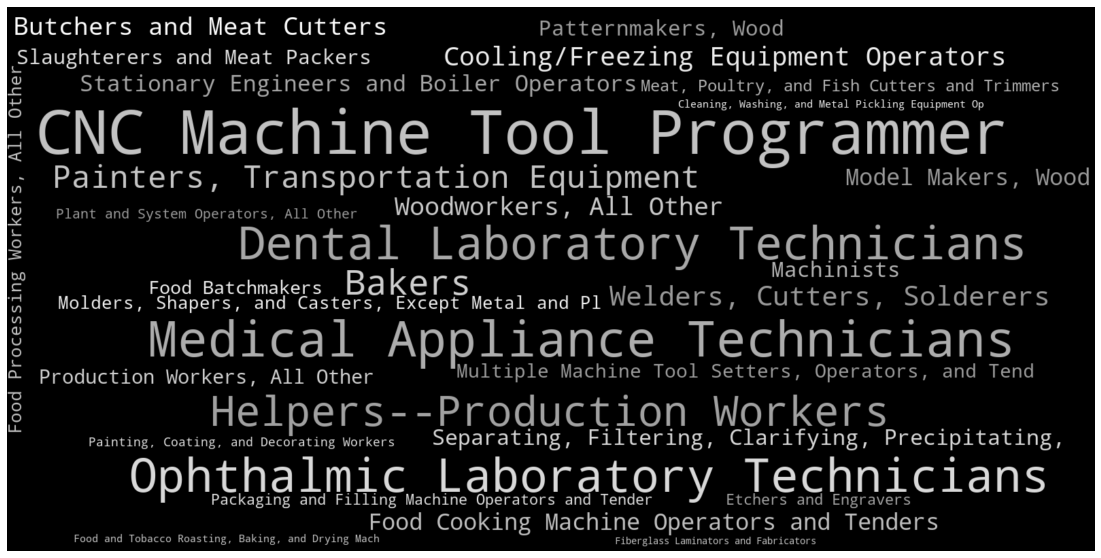

In [120]:
# Plot the word cloud - production
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % np.random.randint(60, 100)

wordcloud = WordCloud(width=1600, height=800, min_font_size = 12)
wordcloud.generate_from_frequencies(dict(prod_tuple))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func), interpolation="bilinear")
plt.axis("off")
plt.show()

In [121]:
# Create a dataframe with just the occupation and the percent change for health support occupations.  This will be for the word cloud.
occs_healthsup_words = occs_healthsup[['Occupational Title', 'Percent Change']].copy(deep=True)
occs_healthsup_words = occs_healthsup_words[occs_healthsup_words['Percent Change'] > 0]
occs_healthsup_words.head()

,Occupational Title,Percent Change
464,Home Health Aides,36.6
465,Psychiatric Aides,11.1
466,Nursing Assistants,8.9
467,Orderlies,4.6
470,Occupational Therapy Assistants,33.1


In [122]:
# In order to create a word cloud, we must convert the data frame into a tuple, which shows the occupational title its count.
healthsup_tuple = [tuple(x) for x in occs_healthsup_words.values]

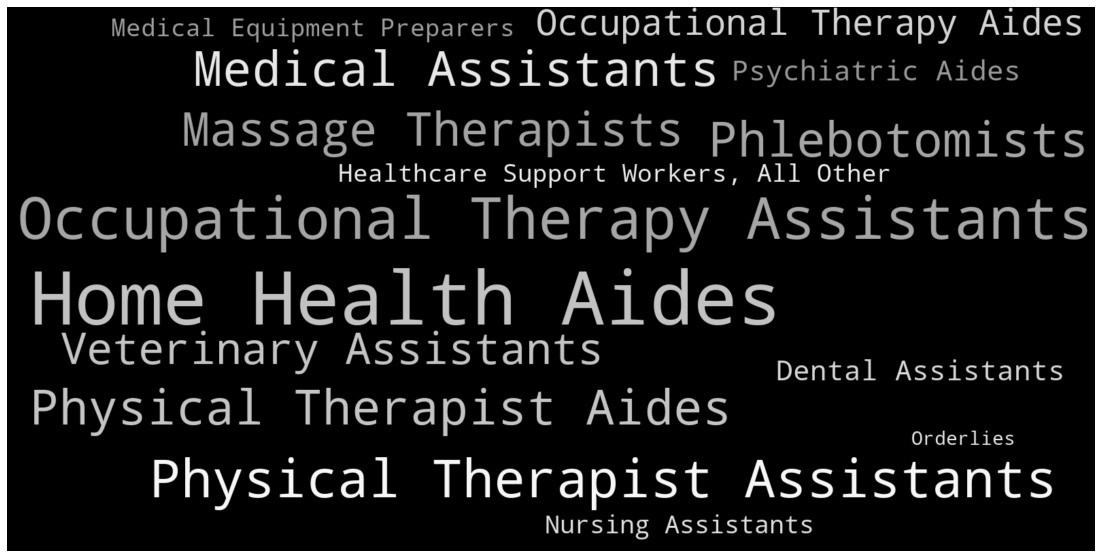

In [123]:
# Plot the word cloud - health support
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % np.random.randint(60, 100)

wordcloud = WordCloud(width=1600, height=800, min_font_size = 12)
wordcloud.generate_from_frequencies(dict(healthsup_tuple))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func), interpolation="bilinear")
plt.axis("off")
plt.show()

In [124]:
# Create a dataframe with just the occupation and the percent change for health practitioner occupations.  This will be for the word cloud.
occs_healthprac_words = occs_healthprac[['Occupational Title', 'Percent Change']].copy(deep=True)
occs_healthprac_words = occs_healthprac_words[occs_healthprac_words['Percent Change'] > 0]
occs_healthprac_words.head()

,Occupational Title,Percent Change
392,Chiropractors,7.4
394,"Dentists, General",7.6
395,Oral and Maxillofacial Surgeons,7.4
396,Orthodontists,7.3
397,Prosthodontists,7.3


In [125]:
# In order to create a word cloud, we must convert the data frame into a tuple, which shows the occupational title its count.
healthprac_tuple = [tuple(x) for x in occs_healthprac_words.values]

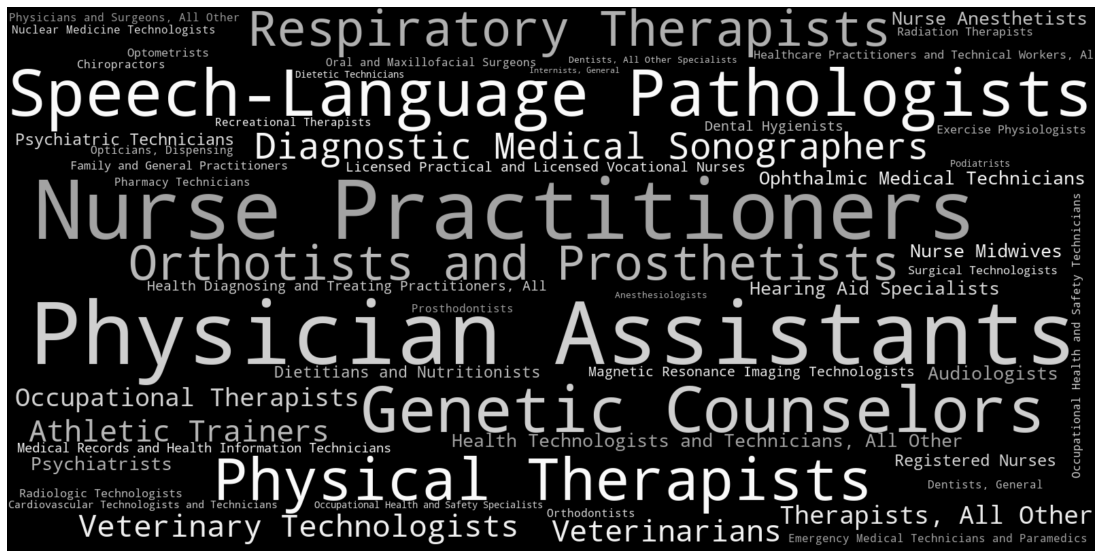

In [126]:
# Plot the word cloud - health practitioners
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % np.random.randint(60, 100)

wordcloud = WordCloud(width=1600, height=800, min_font_size = 12)
wordcloud.generate_from_frequencies(dict(healthprac_tuple))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func), interpolation="bilinear")
plt.axis("off")
plt.show()